## Step 1: Creating Tokens

In [3]:
with open("wharton_verdict.txt","r", encoding = "utf-8") as f:
    raw_text = f.read()
print(raw_text[:99])
print(f'total number of characters are : {len(raw_text)}')

The verdict
Edith wharton

I had always thought Jack Gisburn rather a cheap genius--though a good f
total number of characters are : 20415


Our goal is to tokenize this 20,479-character short story into individual words and special
characters that we can then turn into embeddings for LLM training  

In [4]:
import re

text = "hello, world. This is a text file!!!. It contains some text."
result = re.split(r'(\s)', text) ## \s splits wherever thiere is a whitespace

print(result)

['hello,', ' ', 'world.', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'text', ' ', 'file!!!.', ' ', 'It', ' ', 'contains', ' ', 'some', ' ', 'text.']


The result is a list of individual words, whitespaces, and punctuation characters


Right now the commas and fullstops are part of the words as they dont have white spaces

In [5]:
result = re.split(r'([,.]|\s)', text)
print(result)

['hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'text', ' ', 'file!!!', '.', '', ' ', 'It', ' ', 'contains', ' ', 'some', ' ', 'text', '.', '']


We can see that the words and punctuation characters are now separate list entries just as
we wanted

A small remaining issue is that the list still includes whitespace characters. Optionally, we
can remove these redundant characters safely as follows

In [6]:
result = [item for item in result if item.strip()]
print(result)

['hello', ',', 'world', '.', 'This', 'is', 'a', 'text', 'file!!!', '.', 'It', 'contains', 'some', 'text', '.']



REMOVING WHITESPACES OR NOT


When developing a simple tokenizer, whether we should encode whitespaces as
separate characters or just remove them depends on our application and its
requirements. Removing whitespaces reduces the memory and computing
requirements. However, keeping whitespaces can be useful if we train models that
are sensitive to the exact structure of the text (for example, Python code, which is
sensitive to indentation and spacing). Here, we remove whitespaces for simplicity
and brevity of the tokenized outputs. Later, we will switch to a tokenization scheme
that includes whitespaces.

In [7]:
result = re.split(r'([,.:;"!?()\'_]|--|\s)', text)
result = [item for item in result if item.strip()]
print(result)

['hello', ',', 'world', '.', 'This', 'is', 'a', 'text', 'file', '!', '!', '!', '.', 'It', 'contains', 'some', 'text', '.']


Now we apply this basic tokenizer to edith whartons short story

In [8]:
def basic_tokenizer(text):
    result = re.split(r'([,.:;"!?()\'_]|--|\s)', text)
    result = [item for item in result if item.strip()]
    print(result[:50])
    return result

In [9]:
pre_processed = basic_tokenizer(raw_text)


['The', 'verdict', 'Edith', 'wharton', 'I', 'had', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow']


In [10]:
print(f'the total numeber of words : {len(pre_processed)}')

the total numeber of words : 4650


## Step 2: Creating Token IDs

In the previous section, we tokenized Edith Wharton's short story and assigned it to a
Python variable called preprocessed. Let's now create a list of all unique tokens and sort
them alphabetically to determine the vocabulary size

In [11]:
all_words = sorted(set(pre_processed))
vocab_size = len(all_words)
print(all_words[:50])
print(f'the total number of unique words : {vocab_size}')

['!', '"', "'", '(', ')', ',', '--', '.', ':', ';', '?', 'A', 'AM', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed', 'Devonshire', 'Don', 'Dubarry', 'Edith', 'Emperors', 'FELT', 'Florence', 'For', 'Gallery', 'Gideon', 'Gisburn', 'Gisburns', 'Grafton', 'Greek', 'Grindle', 'Grindles', 'HAD', 'HAS', 'HAVE']
the total number of unique words : 1150


In [12]:
vocab = {token:integer for integer, token in enumerate(all_words)}
print(vocab)


{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'AM': 12, 'Ah': 13, 'Among': 14, 'And': 15, 'Are': 16, 'Arrt': 17, 'As': 18, 'At': 19, 'Be': 20, 'Begin': 21, 'Burlington': 22, 'But': 23, 'By': 24, 'Carlo': 25, 'Chicago': 26, 'Claude': 27, 'Come': 28, 'Croft': 29, 'Destroyed': 30, 'Devonshire': 31, 'Don': 32, 'Dubarry': 33, 'Edith': 34, 'Emperors': 35, 'FELT': 36, 'Florence': 37, 'For': 38, 'Gallery': 39, 'Gideon': 40, 'Gisburn': 41, 'Gisburns': 42, 'Grafton': 43, 'Greek': 44, 'Grindle': 45, 'Grindles': 46, 'HAD': 47, 'HAS': 48, 'HAVE': 49, 'Had': 50, 'Hang': 51, 'Has': 52, 'He': 53, 'Her': 54, 'Hermia': 55, 'His': 56, 'How': 57, 'I': 58, 'If': 59, 'In': 60, 'It': 61, 'Jack': 62, 'Jove': 63, 'Just': 64, 'KNOWN': 65, 'Lord': 66, 'MINE': 67, 'Made': 68, 'Miss': 69, 'Money': 70, 'Monte': 71, 'Moondancers': 72, 'Mr': 73, 'Mrs': 74, 'My': 75, 'NEVER': 76, 'NOT': 77, 'Never': 78, 'No': 79, 'Now': 80, 'Nutley': 81, 'Of': 82, 'Oh': 83, 'On': 8

As we can see, based on the output above, the dictionary contains individual tokens
associated with unique integer labels. 

Later in this book, when we want to convert the outputs of an LLM from numbers back into
text, we also need a way to turn token IDs into text. 

For this, we can create an inverse
version of the vocabulary that maps token IDs back to corresponding text tokens.

Let's implement a complete tokenizer class in Python.

The class will have an encode method that splits
text into tokens and carries out the string-to-integer mapping to produce token IDs via the
vocabulary. 

In addition, we implement a decode method that carries out the reverse
integer-to-string mapping to convert the token IDs back into text.


<div class="alert alert-block alert-info">
    
Step 1: Store the vocabulary as a class attribute for access in the encode and decode methods
    
Step 2: Create an inverse vocabulary that maps token IDs back to the original text tokens

Step 3: Process input text into token IDs

Step 4: Convert token IDs back into text

Step 5: Replace spaces before the specified punctuation

</div>



In [13]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int =vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self, text):
        pre_processed = re.split(r'([,.:;"!?()\'_]|--|\s)', text)   
        pre_processed = [item for item in pre_processed if item.strip()]
        ids = [self.str_to_int[word] for word in pre_processed]
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])   
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)#remove unnecessary spaces before punctuation marks in the string text,   r'\1'This tells Python to replace the entire match (space + punctuation) with just the punctuation mark (i.e., what's in group 1), removing the space.
        return text
        



In [14]:
tokenizer = SimpleTokenizerV1(vocab)
text = """It's the last he painted, you know," 
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[61, 2, 868, 1006, 616, 547, 764, 5, 1146, 611, 5, 1, 74, 7, 41, 869, 1128, 772, 812, 7]


In [15]:
tokenizer.decode(ids)

'It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

<div class="alert alert-block alert-success">

So far, so good. We implemented a tokenizer capable of tokenizing and de-tokenizing
text based on a snippet from the training set. 

Let's now apply it to a new text sample that
is not contained in the training set:
</div>

In [16]:
text = "hello, world. This is a text file!!!. It contains some text."
print(tokenizer.encode(text))

KeyError: 'hello'

<div class="alert alert-block alert-warning">
    
The problem is that the word "Hello" was not used in the The Verdict short story. 

Hence, it
is not contained in the vocabulary. 

This highlights the need to consider large and diverse
training sets to extend the vocabulary when working on LLMs.

</div>

In the previous section, we implemented a simple tokenizer and applied it to a passage
from the training set. 

In this section, we will modify this tokenizer to handle unknown
words.


In particular, we will modify the vocabulary and tokenizer we implemented in the
previous section, SimpleTokenizerV2, to support two new tokens, <|unk|> and
<|endoftext|>


In [17]:
all_tokens = sorted(list(set(pre_processed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}


In [18]:
len(vocab.items())

1152

In [19]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1147)
('your', 1148)
('yourself', 1149)
('<|endoftext|>', 1150)
('<|unk|>', 1151)


In [20]:
class SimpleTokenizerV2:
    def __init__(self,vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        pre_processed = re.split(r'([,.:;"!?()\'_]|--|\s)', text)   
        pre_processed = [item for item in pre_processed if item.strip()]
        pre_processed = [item if item in self.str_to_int else "<|unk|>" for item in pre_processed]

        ids = [self.str_to_int[s] for s in pre_processed]
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text


In [21]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "hello, do you like tea and cars?"
text2 = "in the sunlit terraces of the palace."

text = "<|endoftext|> ".join([text1, text2])
print(text)

hello, do you like tea and cars?<|endoftext|> in the sunlit terraces of the palace.


In [22]:
tokenizer.encode(text)


[1151,
 5,
 369,
 1146,
 643,
 993,
 169,
 1151,
 10,
 1150,
 583,
 1006,
 974,
 1002,
 739,
 1006,
 1151,
 7]

In [23]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea and <|unk|>? <|endoftext|> in the sunlit terraces of the <|unk|>.'

<div class="alert alert-block alert-warning">

So far, we have discussed tokenization as an essential step in processing text as input to
LLMs. Depending on the LLM, some researchers also consider additional special tokens such
as the following:

[BOS] (beginning of sequence): This token marks the start of a text. It
signifies to the LLM where a piece of content begins.

[EOS] (end of sequence): This token is positioned at the end of a text,
and is especially useful when concatenating multiple unrelated texts,
similar to <|endoftext|>. For instance, when combining two different
Wikipedia articles or books, the [EOS] token indicates where one article
ends and the next one begins.

[PAD] (padding): When training LLMs with batch sizes larger than one,
the batch might contain texts of varying lengths. To ensure all texts have
the same length, the shorter texts are extended or "padded" using the
[PAD] token, up to the length of the longest text in the batch.

</div>


<div class="alert alert-block alert-warning">

Note that the tokenizer used for GPT models does not need any of these tokens mentioned
above but only uses an <|endoftext|> token for simplicity

</div>

<div class="alert alert-block alert-warning">

the tokenizer used for GPT models also doesn't use an <|unk|> token for outof-vocabulary words. Instead, GPT models use a byte pair encoding tokenizer, which breaks
down words into subword units
</div>

### BYTE PAIR ENCODING (subword based)


**BPE Tokenizer**

In [24]:
! pip3 install tiktoken 

In [25]:
import tiktoken

In [26]:
tokenizer = tiktoken.get_encoding("gpt2")

In [27]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special= {"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [28]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


data sampling with sliding window

![Screenshot 2025-05-25 at 4.03.23 PM.png](<attachment:Screenshot 2025-05-25 at 4.03.23 PM.png>)
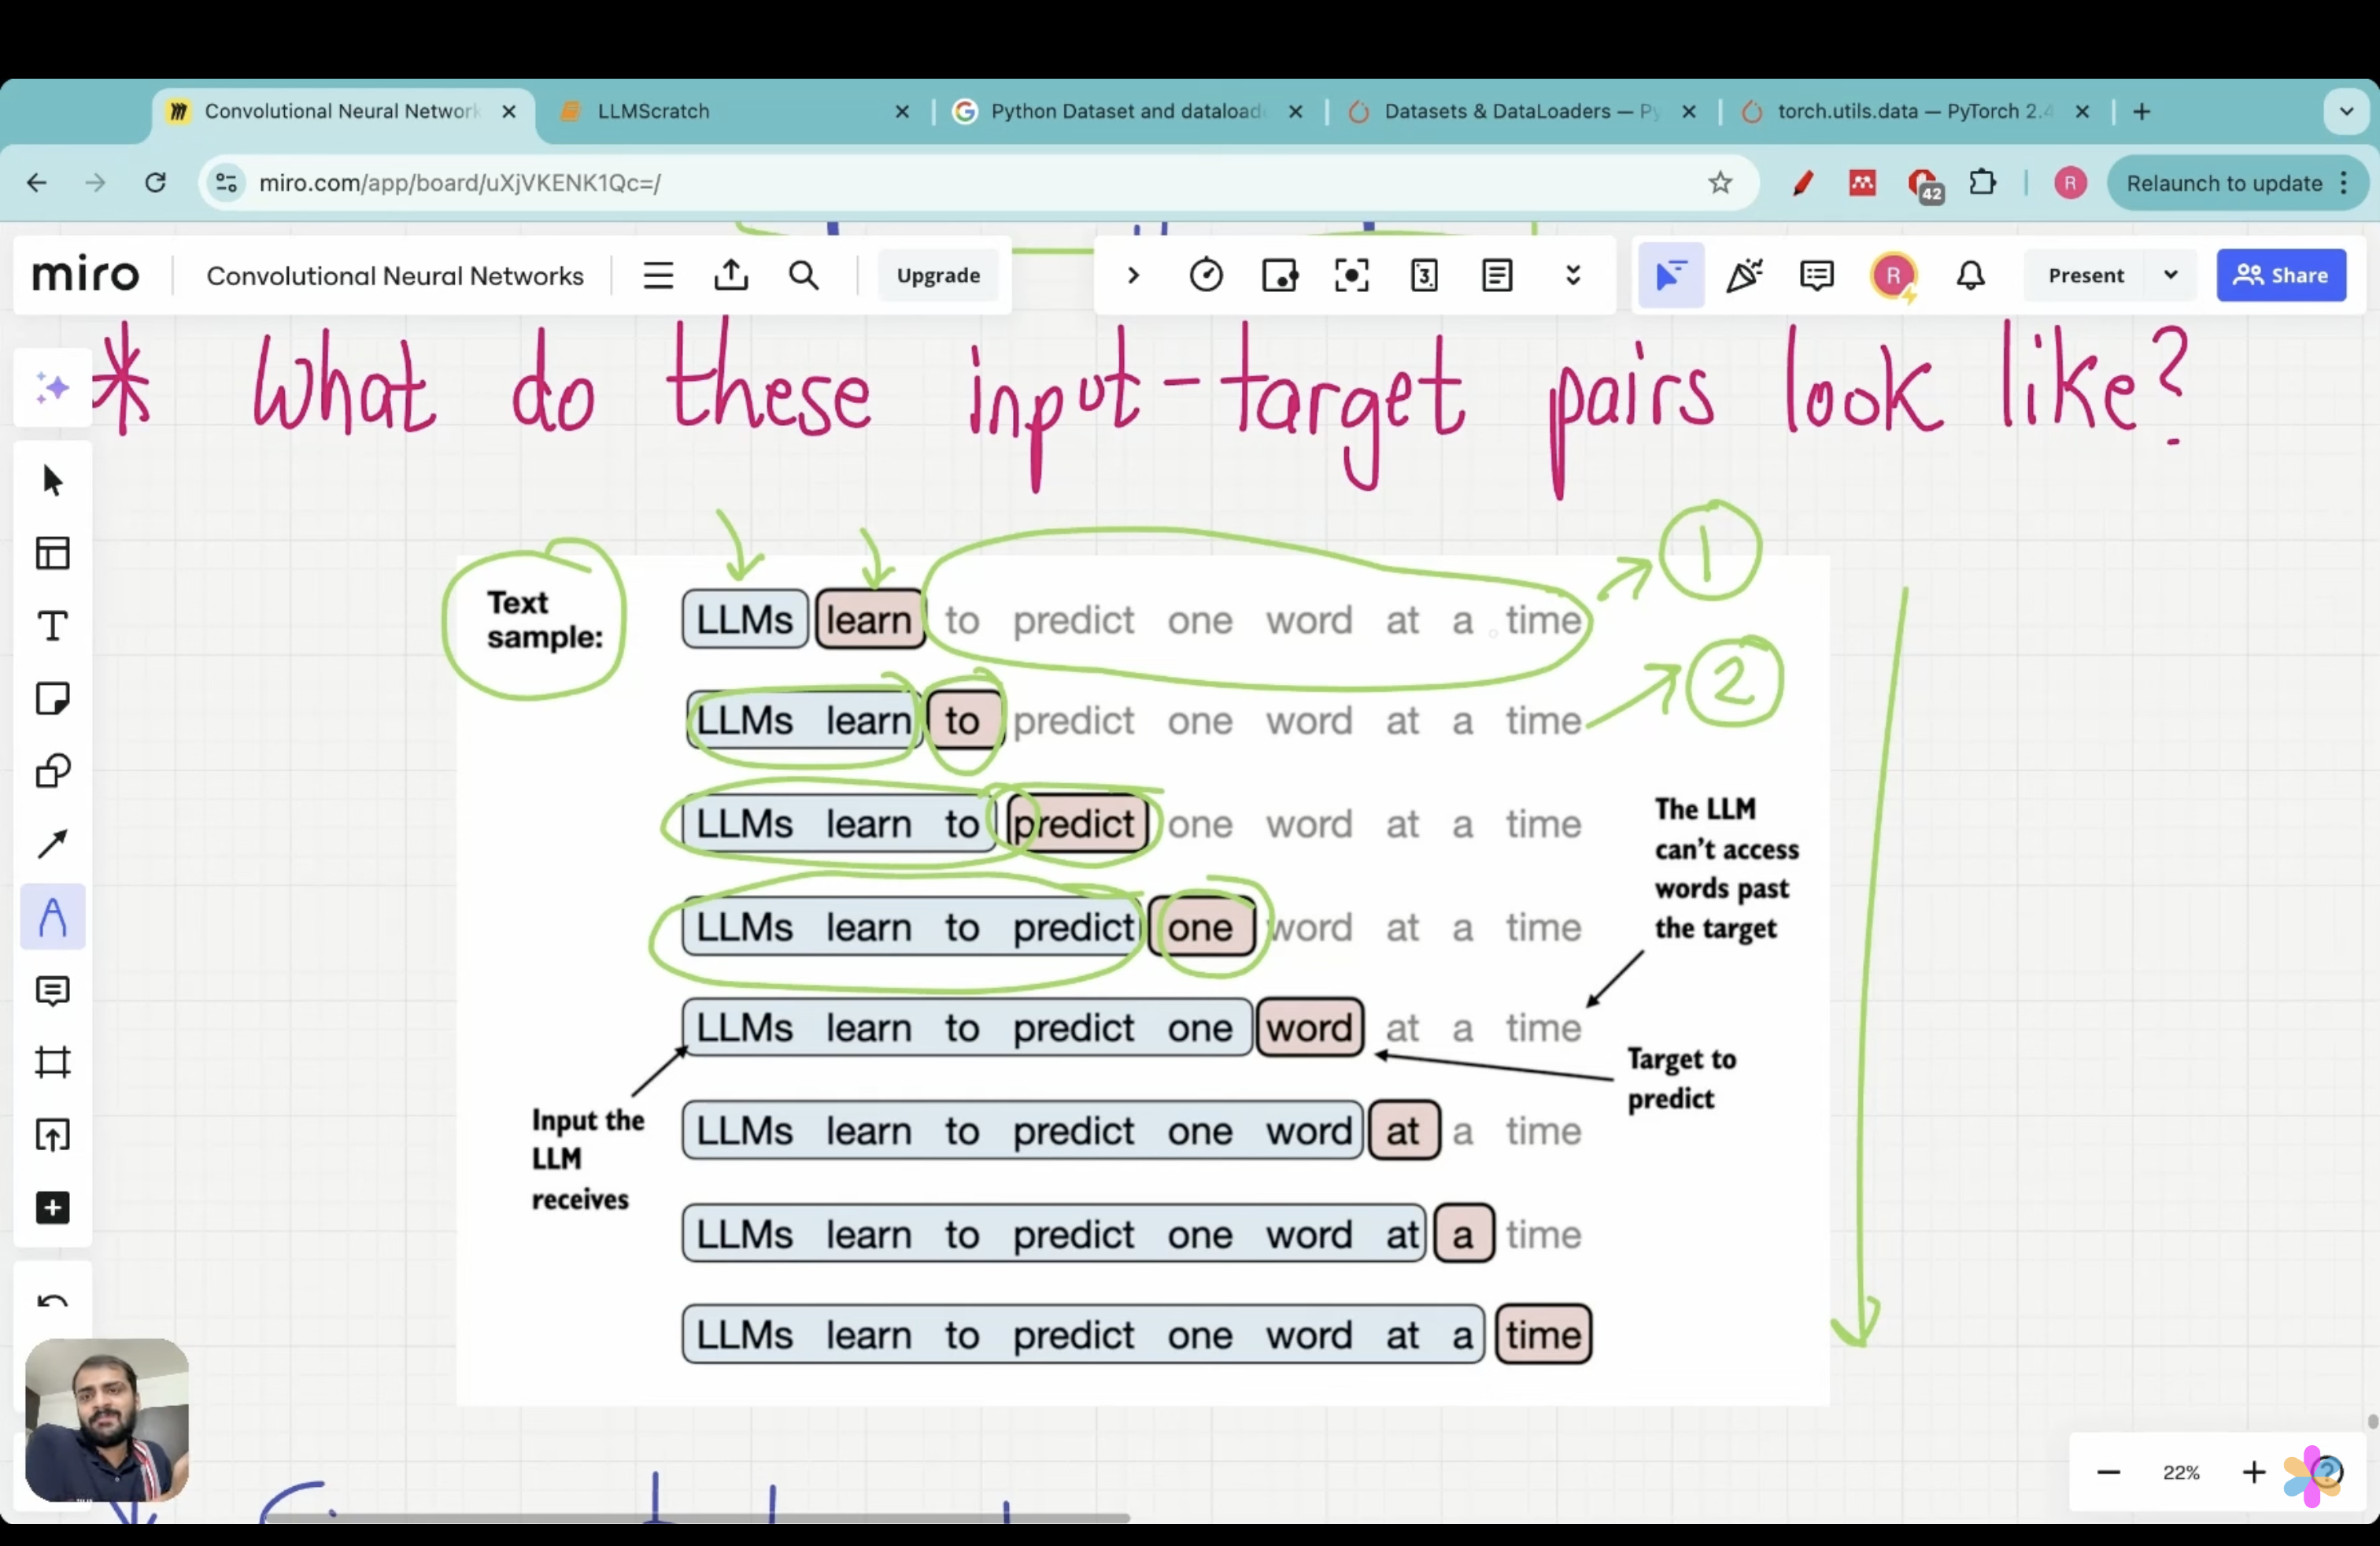

In [29]:
with open("wharton_verdict.txt", "r", encoding= "utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))


5317


In [30]:
enc_sample = enc_text[:50]
print(enc_sample)
dec_sample = tokenizer.decode(enc_sample)
print(dec_sample)

[464, 15593, 198, 7407, 342, 348, 41328, 198, 198, 40, 550, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 198, 48229, 438, 568, 340, 373, 645, 1049, 5975, 284, 502, 284, 3285, 326, 11, 287, 262, 6001, 286, 465, 13476, 11, 339, 198]
The verdict
Edith wharton

I had always thought Jack Gisburn rather a cheap genius--though a good fellow
enough--so it was no great surprise to me to hear that, in the height of his glory, he



In [31]:
context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size +1]

print(f"x: {x}")
print(f"y:      {y}")

x: [464, 15593, 198, 7407]
y:      [15593, 198, 7407, 342]
